1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


using the covariance matrix
eigenvalues:
 [2.78658553e+01 5.03265705e-16 2.02895445e+00] 
eigenvectors:
 [[-0.11912697 -0.81649658  0.56492663]
 [-0.57276402 -0.40824829 -0.71082678]
 [-0.81101796  0.40824829  0.41902649]]

using SVD
eigenvalues (spectrum):
 [2.78827841e+01 2.02896764e+00 1.36127430e-29] 
eigenvectors:
 [[-0.11911664  0.56492881 -0.81649658]
 [-0.57277702 -0.7108163  -0.40824829]
 [-0.8110103   0.41904132  0.40824829]]


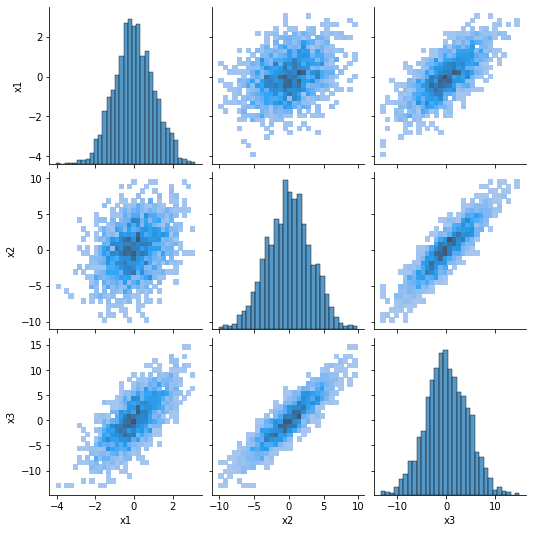

In [31]:
N = 2000
x1 = npr.normal(0, 1, N)
x2 = x1 + npr.normal(0, 3, N)
x3 = 2*x1 + x2
X, columns = np.array([x1, x2, x3]), ['x1', 'x2', 'x3']
dist = pd.DataFrame(X.T, columns = columns)

# ...using the covariance matrix
print("\nusing the covariance matrix")
cov = np.cov(dist.T)
l, V = np.linalg.eig(cov)
print('eigenvalues:\n',l, '\neigenvectors:\n',V)


print("\nusing SVD")
U, spectrum, Vt = np.linalg.svd(dist.T)
l_svd, V_svd = spectrum**2/(N-1), U
print("eigenvalues (spectrum):\n", np.real_if_close(l_svd), '\neigenvectors:\n', V_svd)

import seaborn as sns     # adding a pairplot to visualize better the distributions and their correlations
p = sns.pairplot(dist, kind="hist")

In [57]:
trace = np.diag(l).trace()
ratio = []
l_red = []
V_red = []
dist_red = pd.DataFrame()
print("% of variability retained by every component")
for i in range(len(l)):
    print(l[i]/trace)
    ratio.append(l[i]/trace)
for i in range(len(l)):          # I made a loop that autonomously derives the two main variables
    for j in range(i+1, len(l)):
        if ratio[i]+ratio[j]>=0.99 :
            print(columns[i], "and", columns[j], "together retain at least the 99% of the variability")
            dist_red.insert(len(dist_red.columns), columns[i], X[i])
            dist_red.insert(len(dist_red.columns), columns[j], X[j])
            l_red.append(l[i]), l_red.append(l[j])
            V_red.append(V[i]), V_red.append(V[j])
            V_red = np.array(V_red)
            perc = ratio[i]+ratio[j]
print("\nreduced dataframe:")
print(dist_red)


% of variability retained by every component
0.9321302104066912
1.6834551196515688e-17
0.06786978959330875
x1 and x3 together retain at least the 99% of the variability

reduced dataframe:
            x1         x3
0     1.022292  11.871095
1    -0.764980   2.219684
2    -0.570095   1.620488
3    -0.383370  -4.748519
4     0.746941   4.173583
...        ...        ...
1995 -1.863559  -5.073035
1996  0.322276  -3.489501
1997  3.147414   9.060429
1998  0.696050  -3.324945
1999 -0.922209  -1.986278

[2000 rows x 2 columns]


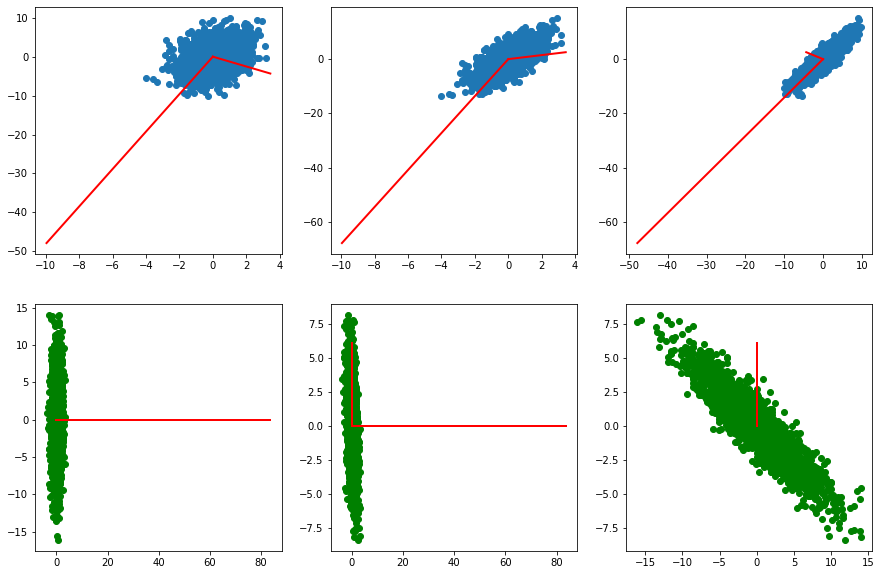

In [58]:
#definisci una nuova base x1',x2',x3' fornita dalla PCA precedente
fig, axs = plt.subplots(2, 3, figsize=(15,10))

#rotating the dataset
X_rot = np.dot(V, dist.T)

axs[0,0].scatter(dist['x1'], dist['x2'])
axs[0,1].scatter(dist['x1'], dist['x3'])
axs[0,2].scatter(dist['x2'], dist['x3'])

axs[1,0].scatter(X_rot[0,:], X_rot[1,:], c='g')
axs[1,1].scatter(X_rot[0,:], X_rot[2,:], c='g')
axs[1,2].scatter(X_rot[1,:], X_rot[2,:], c='g')

scale_factor = 3
# draw each eigenvector
for li, vi in zip(l, V.T):
    # the line is defined by means of its beginning and its end 
    axs[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    axs[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    axs[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
for li, vi in zip(l, np.diag([1]*3)):
    axs[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    axs[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    axs[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [59]:
dist2 = dist.copy()
noise_num = 10
for i in range(noise_num):
    dist2.insert(len(dist2.columns), 'noise'+str(i), npr.normal(0, npr.randint(0, 10)/50, N))
dist2

,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,1.022292,9.826511,11.871095,-0.061504,0.046444,-0.086926,0.130506,0.0,-0.063423,0.095724,-0.229278,-0.041678,0.033089
1,-0.764980,3.749644,2.219684,0.169006,0.048193,-0.027889,0.107002,0.0,0.024930,-0.118402,-0.035281,-0.076923,-0.173245
2,-0.570095,2.760678,1.620488,-0.247622,0.012921,-0.276732,-0.112623,0.0,-0.040512,-0.051926,-0.278281,0.180068,-0.064409
3,-0.383370,-3.981778,-4.748519,-0.092141,-0.008759,0.005762,0.141850,0.0,-0.063725,0.083079,0.199492,0.195622,-0.035815
4,0.746941,2.679701,4.173583,0.159170,0.247757,-0.194130,-0.234126,0.0,-0.074342,-0.111250,-0.171847,0.009198,-0.211331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.863559,-1.345917,-5.073035,-0.117411,0.052776,0.232038,-0.076375,0.0,-0.047773,0.012319,-0.095566,-0.204936,0.111482
1996,0.322276,-4.134053,-3.489501,-0.029213,0.111668,-0.518967,-0.136084,0.0,0.058121,0.055038,0.083858,0.170107,-0.049574
1997,3.147414,2.765602,9.060429,0.019182,-0.002630,0.044083,0.259101,0.0,-0.256326,0.128564,0.156649,0.292655,0.029342
1998,0.696050,-4.717045,-3.324945,0.013646,-0.134244,-0.030979,0.316991,0.0,-0.062226,0.038499,0.037315,-0.260926,-0.115334


In [61]:
l2, V2 = np.linalg.eig(np.cov(dist2.T))
# print('eigenvalues with noise:\n',l2, '\neigenvectors with noise:\n',V2)

l2_max1, l2_max2, index1, index2 = 0, 0, 0, 0
trace2, ratio2 = np.diag(l2).trace(), []
for i in range(len(l2)):
    ratio2.append(l2[i]/trace2)
for i in range(len(l2)):
    if l2[i] > l2_max1:
        l2_max1 = l2[i]
        index1 = i
    elif l2[i] > l2_max2:
        l2_max2 = l2[i]
        index2 = i
l2_red = np.array([l2_max1, l2_max2])
V2_red = np.array([V2[index1], V2[index2]])
perc2 = ratio2[index1] + ratio2[index2]
print ("1st point PCA eigenvalues:\n", l_red, "variability retained:", perc, "\n2st point PCA eigenvalues (noise):\n", l2_red)
print ("\n2st point PCA eigenvalues (noise):\n", l2_red, "variability retained:", perc2)
print ("\n\n1st point PCA eigenvectors:\n", V_red, "\n2st point PCA eigenvectors (noise):\n", V2_red)

1st point PCA eigenvalues:
 [27.8658553077117, 2.028954448055944] variability retained: 1.0 
2st point PCA eigenvalues (noise):
 [27.86596758  2.02903955]

2st point PCA eigenvalues (noise):
 [27.86596758  2.02903955] variability retained: 0.9937382786859439


1st point PCA eigenvectors:
 [[-0.11912697 -0.81649658  0.56492663]
 [-0.81101796  0.40824829  0.41902649]] 
2st point PCA eigenvectors (noise):
 [[-1.19126563e-01  5.64915115e-01  8.16496581e-01 -1.29625040e-03
   7.54990656e-04 -2.95953227e-03  1.01980908e-03  3.09894051e-04
  -3.10525090e-04 -4.78557740e-04 -7.85551829e-04  1.42045057e-04
   0.00000000e+00]
 [-5.72763079e-01 -7.10809341e-01  4.08248290e-01  2.27601101e-03
  -2.63222151e-04  3.89966749e-03 -1.26093379e-03  1.31493914e-04
   3.73393142e-04  1.38850182e-03  1.28970434e-03  2.74425940e-04
   0.00000000e+00]]


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
